In [2]:
import pandas as pd
scores = pd.read_csv("./bipolar_only_MSIGDB_importance_scores_NEW.tsv", sep="\t")
# dgidb = pd.read_csv("../../Data/DGIDB/converted/human/dgidb_ncbi_v2.csv")
NCBI_PATH = "../../Data/ncbi/gene2refseq.gz"
NCBI_INFO = pd.read_csv(NCBI_PATH, sep='\t', compression='gzip')

c:\Users\richa\Desktop\CodingWorkspaces\DGI-Hypergraph\datatestingvenv\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (2,4,6,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
human_gene2refseq = NCBI_INFO[NCBI_INFO['#tax_id'] == 9606]
id_to_gene_claim = pd.Series(human_gene2refseq.Symbol.values, index=human_gene2refseq.GeneID).to_dict()
def get_gene_claim_name(ncbi_gene_id):
    ncbi_gene_id = int(ncbi_gene_id)
    # result = dgidb[dgidb['ncbi_gene_id'] == ncbi_gene_id]
    result = id_to_gene_claim[ncbi_gene_id]
    if result:
        return result
    else:
        return "Gene name not found"
    
import json

# Load the JSON data from the file
with open('../../Data/hypergraphs/MSIGDB_HumanNet/human/gene_to_index.json', 'r') as file:
    gene_to_index = json.load(file)

# Invert the dictionary to map indices back to genes
index_to_gene = {v: k for k, v in gene_to_index.items()}



def get_gene_by_index(index):
    return index_to_gene.get(index, "Index not found")

In [4]:

# import pandas as pd

# # Assume NCBI_INFO is your DataFrame
# # Filter for Homo sapiens genes (tax_id = 9606)
# human_gene2refseq = NCBI_INFO[NCBI_INFO['#tax_id'] == 9606]

# # Create a mapping from NCBI gene IDs (GeneID) to gene claim names (Symbol)
# id_to_gene_claim = pd.Series(human_gene2refseq.Symbol.values, index=human_gene2refseq.GeneID).to_dict()
# gene_claim_to_id = pd.Series(human_gene2refseq.GeneID.values, index=human_gene2refseq.Symbol).to_dict()

# # Example usage for looking up the gene claim name using an NCBI Gene ID
# ncbi_gene_id = 8  # Replace with your desired NCBI Gene ID
# gene_claim_name = id_to_gene_claim.get(ncbi_gene_id, "Gene claim name not found")
# print(f"Gene claim name for NCBI Gene ID {ncbi_gene_id}: {gene_claim_name}")

# # Example usage for looking up the NCBI Gene ID using a gene claim name
# gene_claim_name = "HTR2C"  # Replace with your desired gene claim name
# ncbi_gene_id = gene_claim_to_id.get(gene_claim_name, "NCBI gene ID not found")
# print(f"NCBI Gene ID for Gene Claim Name {gene_claim_name}: {ncbi_gene_id}")


In [5]:
# import json

# # Load the JSON data from the file
# with open('../../Data/hypergraphs/DGIDB_HumanNet/human/undirected/bipolar/gene_to_index.json', 'r') as file:
#     gene_to_index = json.load(file)

# # Invert the dictionary to map indices back to genes
# index_to_gene = {v: k for k, v in gene_to_index.items()}

# def get_gene_by_index(index):
#     return index_to_gene.get(index, "Index not found")


In [6]:
# # Function to get the gene_claim_name from ncbi_gene_id
# def get_gene_claim_name_via_DGIDB(gene_index):
#     ncbi_gene_id = int(get_gene_by_index(gene_index))
#     # result = dgidb[dgidb['ncbi_gene_id'] == ncbi_gene_id]
#     result = dgidb[(dgidb['ncbi_gene_id']) == ncbi_gene_id]
#     if not result.empty:
#         return result['gene_name'].values[0]
#     else:
#         return "DGIDB GENE CLAIM NAME NOT FOUND"
# def get_gene_claim_name_via_NCBI(gene_index):
#     ncbi_gene_id = int(get_gene_by_index(gene_index))
#     return id_to_gene_claim.get(ncbi_gene_id, "NCBI GENE CLIAIM NAME NOT FOUND")
def get_gene_claim_name(gene_index):
    ncbi_gene_id = int(get_gene_by_index(gene_index))
    return id_to_gene_claim.get(ncbi_gene_id, "NCBI GENE CLAIM NAME NOT FOUND")
scores['claim_name'] = scores['Gene'].apply(lambda gene: get_gene_claim_name(gene))


In [7]:
scores.rename(columns={'Gene': 'index', 'Score': 'score'}, inplace=True)


In [8]:
# Apply the function to all rows in the 'ncbi_gene_id' column
scores['ncbi_gene_id'] = scores['index'].apply(get_gene_by_index)

In [9]:
print(scores["claim_name"].head(10).to_numpy())

['SRC' 'TNF' 'TP53' 'CYP1A1' 'ALDH1A1' 'PIK3CG' 'HLA-B' 'SERPINA3' 'BDNF'
 'AMD1']


Index(['index', 'score', 'claim_name', 'ncbi_gene_id'], dtype='object')


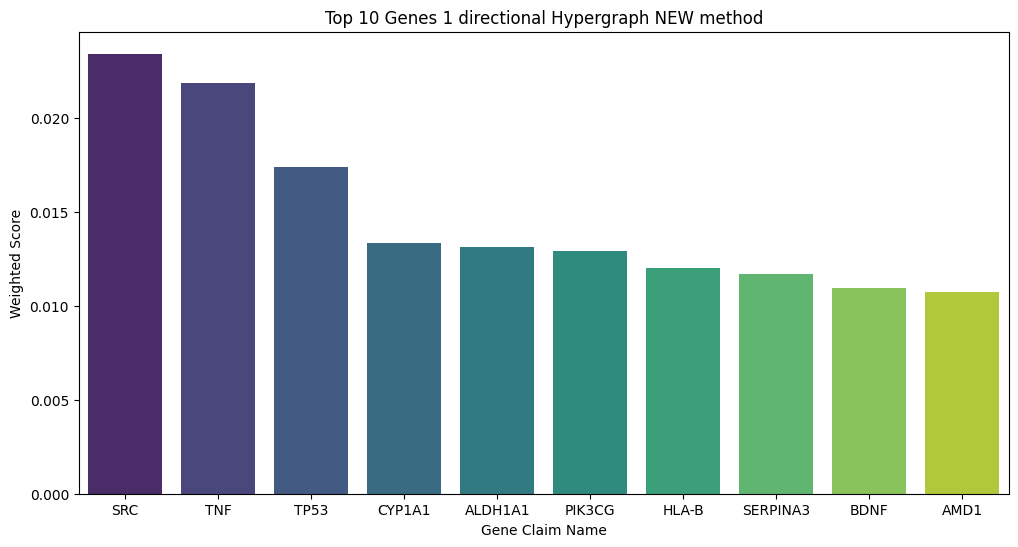

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Use the top 10 genes
df_top_10 = scores.head(10)
# Check the column names
print(scores.columns)
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='claim_name', y='score', data=df_top_10, palette='viridis')
plt.title('Top 10 Genes 1 directional Hypergraph NEW method')
plt.xlabel('Gene Claim Name')
plt.ylabel('Weighted Score')
plt.show()


In [11]:
scores.to_csv("./importance_scores_Unidirectional_bipolar_NEW.tsv", sep="\t", index=False)